In [9]:
import pickle
import traceback
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
 
wandb_group_name = "memo_feb21_uniformdist_modelsize"
# Filter runs by group name
# Initialize lists to store data for the heatmap
n_heads_list = []
n_layers_list = []
accuracy_list = []

item=0
runs = glob(f"./cache/{wandb_group_name}/{wandb_group_name}_*.pkl")


In [10]:
from collections import defaultdict
import json
import traceback
df = defaultdict(list)
for i, run in enumerate(runs):
    # Extract model configurations
    print(run)
    try: 
        with open(run, "rb") as f:
            record = pickle.load(f)
    except Exception as e:
        print (traceback.format_exc())
        continue
    print ("num_heads", record["args"]["num_heads"],"num_layers", record["args"]["num_layers"])
    # record = json.loads(run)
    accs = []
    pos = []
    epochs = []
    for epoch in record["logs"]:
        for ipos in range(record["args"]["len_context"]):
            try:
                accs.append(epoch[f"test_top1_{ipos}"].item())
                pos.append(ipos)
                
                epochs.append(epoch["epoch"])
                # print("failed acc", epoch[f"test_top1_{ipos}"] , "epoch", epoch["epoch"])
            except:
                accs.append(epoch[f"test_top1_{ipos}"] )
                pos.append(ipos)
                
                epochs.append(epoch["epoch"])
                # print("failed acc", epoch[f"test_top1_{ipos}"] , "epoch", epoch["epoch"])
    # df = pd.DataFrame({
    #     "epoch": epochs,
    #     "position": pos,
    #     "accuracy": accs
    # })
    # pivot = df.pivot_table(index="epoch", columns="position", values="accuracy")
    # plt.figure(figsize=(12,8))
    # sns.heatmap(pivot, annot=False)
    # plt.xlabel("Position in Sequence")
    # plt.ylabel("Epoch")
    # plt.title("Accuracy vs. Position in Sequence vs. Epoch")
    # plt.tight_layout()
    # plt.show()
     
    # except Exception as e: 
    #     print (traceback.format_exc())
    #     continue
    
    # Extract model configurations
    l = record["logs"][100]
    test_accs = [l.get(f"test_top1_{i}") for i in range(record["args"]["len_context"]-1)]
    accuracy_list = np.mean(test_accs)
    df["num_heads"].append(record["args"]["num_heads"])
    df["num_layers"].append(record["args"]["num_layers"])
    df["avg_test_accs"].append(avg_test_accs) 
    # if i > 10: break
display (df)

defaultdict(list, {})

In [4]:
# Plot accuracy vs. model size
df = pd.DataFrame({
    "n_heads": n_heads_list,
    "n_layers": n_layers_list,
    "accuracy": accuracy_list, 
    # "loss": loss_list
})
import gpt 
n_layers_unique = sorted(set(n_layers_list)) 
n_heads_unique = sorted(set(n_heads_list))
for nlayer in n_layers_unique:
    for nhead in n_heads_unique:
        _df = df[(df["n_layers"] == nlayer) & (df["n_heads"] == nhead)]
        display (_df)
        dummy_model_config = gpt.GPTConfig(
            block_size = 100,
            n_embd=nhead * 8,
            n_layer=nlayer,
            n_head=nhead,
            bias = True
        )
        dummy_model = gpt.GPT(dummy_model_config, None)
        num_params = dummy_model.get_num_params()
        # if len(indices) > 0:
        #     plt.scatter([nhead] * len(indices), [nlayer] * len(indices), c=[accuracy_list[i] for i in indices], cmap='viridis', s=100)

NameError: name 'loss_list' is not defined

# Feb 21, 24 heads 32 layers 100K sequences

./cache/memo_feb20_zipf/memo_feb20_zipf_transformer_K_100000_L_100_hidden_8_1740109735.440096.pkl
dict_keys(['args', 'logs']) 381 dict_keys(['num_apppearances', 'train_loss', 'epoch', 'lr', 'test_metrics'])
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


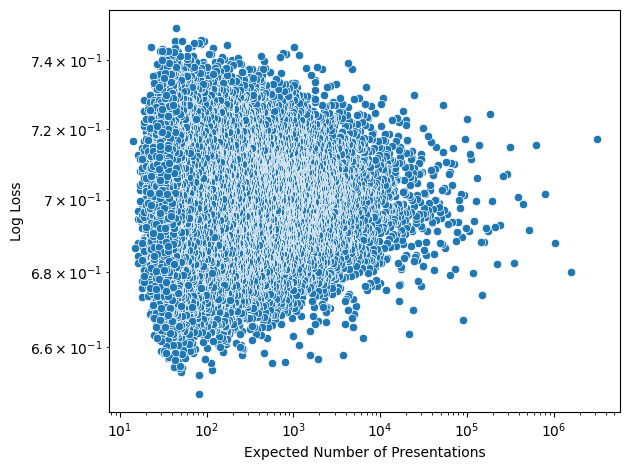

epoch 1 no test_metrics
epoch 2 no test_metrics
epoch 3 no test_metrics
epoch 4 no test_metrics
epoch 5 no test_metrics
epoch 6 no test_metrics
epoch 7 no test_metrics
epoch 8 no test_metrics
epoch 9 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


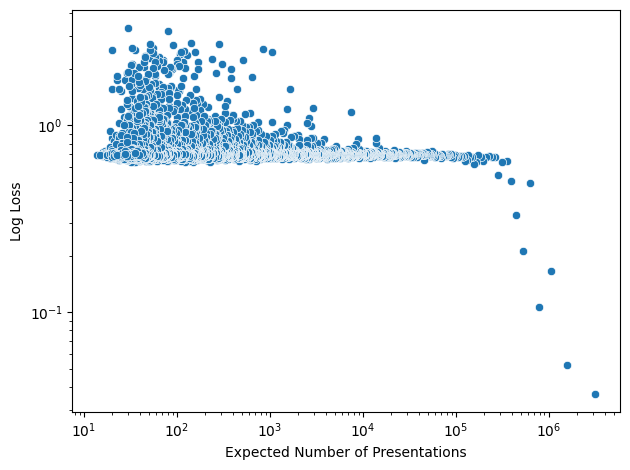

epoch 11 no test_metrics
epoch 12 no test_metrics
epoch 13 no test_metrics
epoch 14 no test_metrics
epoch 15 no test_metrics
epoch 16 no test_metrics
epoch 17 no test_metrics
epoch 18 no test_metrics
epoch 19 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


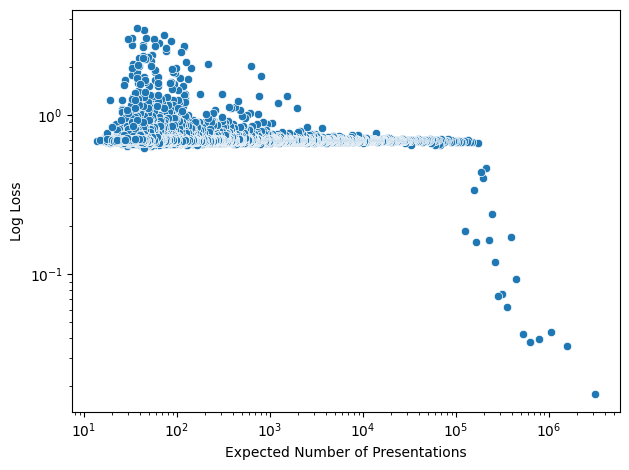

epoch 21 no test_metrics
epoch 22 no test_metrics
epoch 23 no test_metrics
epoch 24 no test_metrics
epoch 25 no test_metrics
epoch 26 no test_metrics
epoch 27 no test_metrics
epoch 28 no test_metrics
epoch 29 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


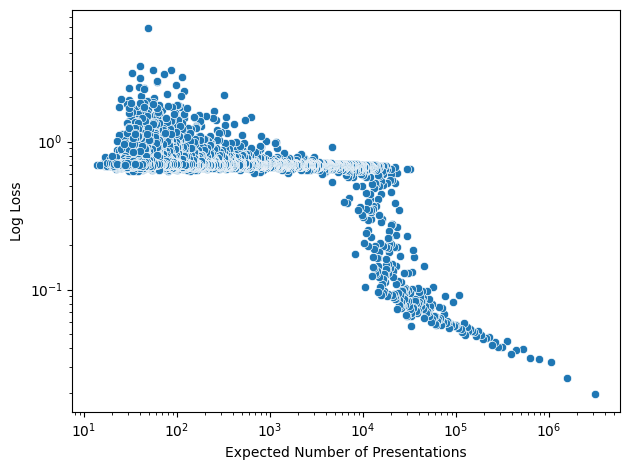

epoch 31 no test_metrics
epoch 32 no test_metrics
epoch 33 no test_metrics
epoch 34 no test_metrics
epoch 35 no test_metrics
epoch 36 no test_metrics
epoch 37 no test_metrics
epoch 38 no test_metrics
epoch 39 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


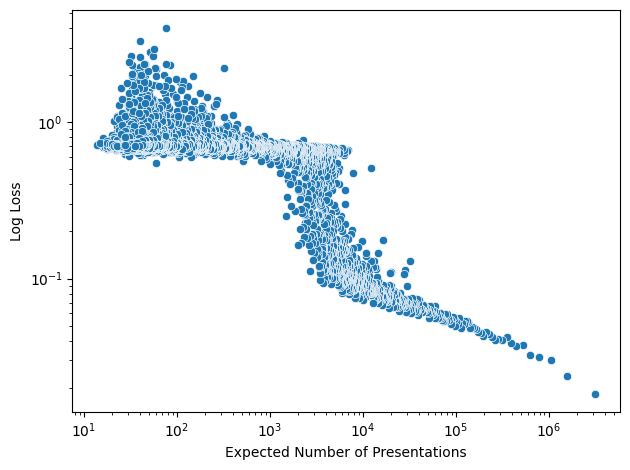

epoch 41 no test_metrics
epoch 42 no test_metrics
epoch 43 no test_metrics
epoch 44 no test_metrics
epoch 45 no test_metrics
epoch 46 no test_metrics
epoch 47 no test_metrics
epoch 48 no test_metrics
epoch 49 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


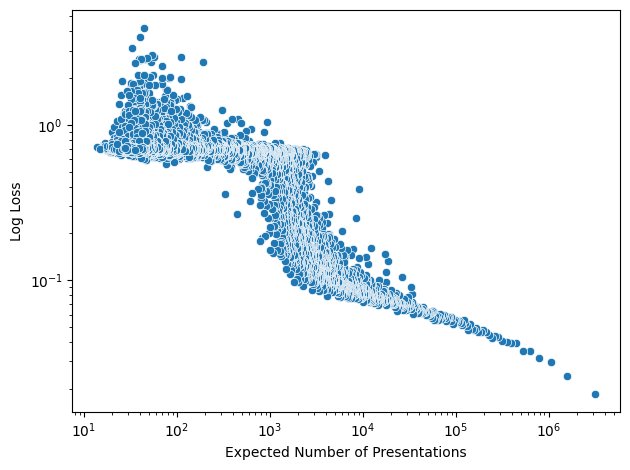

epoch 51 no test_metrics
epoch 52 no test_metrics
epoch 53 no test_metrics
epoch 54 no test_metrics
epoch 55 no test_metrics
epoch 56 no test_metrics
epoch 57 no test_metrics
epoch 58 no test_metrics
epoch 59 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


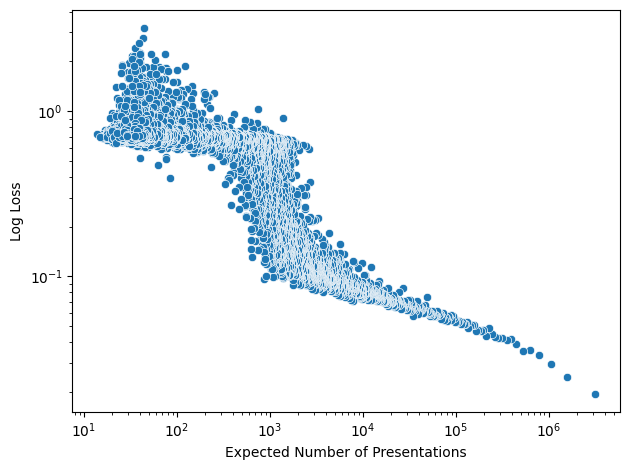

epoch 61 no test_metrics
epoch 62 no test_metrics
epoch 63 no test_metrics
epoch 64 no test_metrics
epoch 65 no test_metrics
epoch 66 no test_metrics
epoch 67 no test_metrics
epoch 68 no test_metrics
epoch 69 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


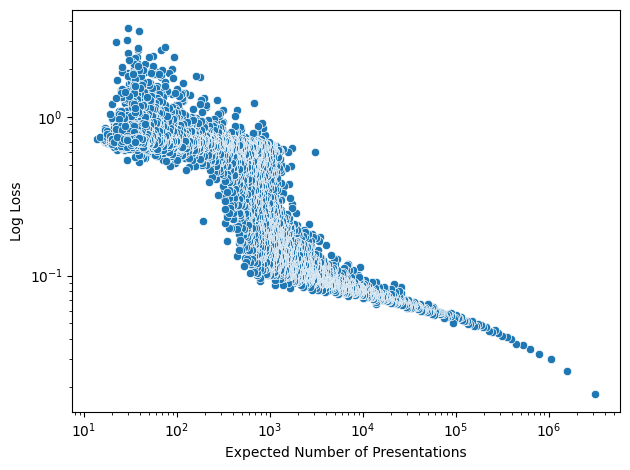

epoch 71 no test_metrics
epoch 72 no test_metrics
epoch 73 no test_metrics
epoch 74 no test_metrics
epoch 75 no test_metrics
epoch 76 no test_metrics
epoch 77 no test_metrics
epoch 78 no test_metrics
epoch 79 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


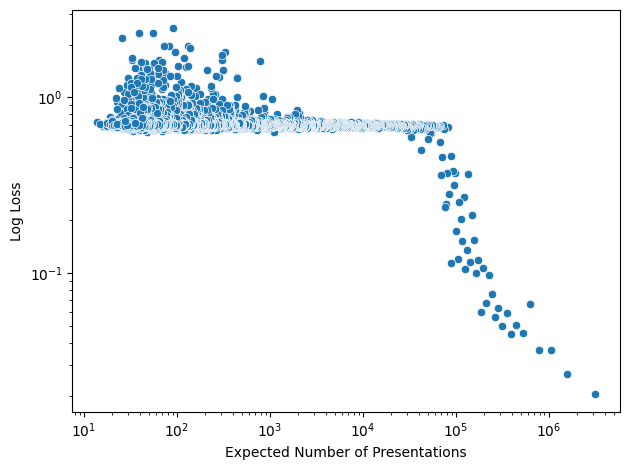

epoch 81 no test_metrics
epoch 82 no test_metrics
epoch 83 no test_metrics
epoch 84 no test_metrics
epoch 85 no test_metrics
epoch 86 no test_metrics
epoch 87 no test_metrics
epoch 88 no test_metrics
epoch 89 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


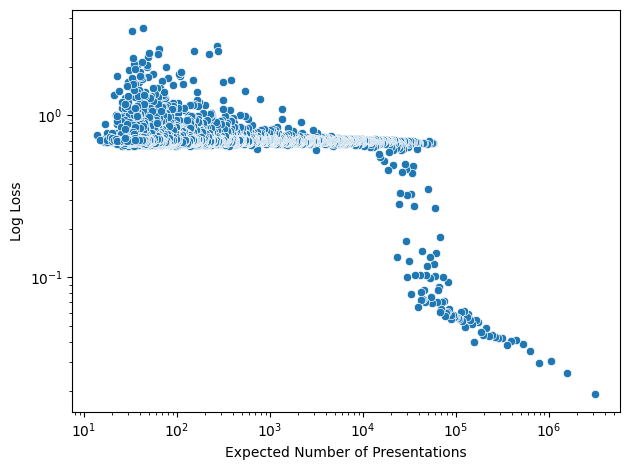

epoch 91 no test_metrics
epoch 92 no test_metrics
epoch 93 no test_metrics
epoch 94 no test_metrics
epoch 95 no test_metrics
epoch 96 no test_metrics
epoch 97 no test_metrics
epoch 98 no test_metrics
epoch 99 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


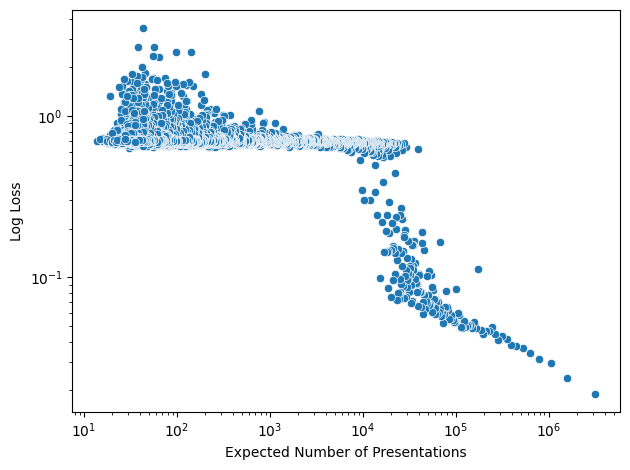

epoch 101 no test_metrics
epoch 102 no test_metrics
epoch 103 no test_metrics
epoch 104 no test_metrics
epoch 105 no test_metrics
epoch 106 no test_metrics
epoch 107 no test_metrics
epoch 108 no test_metrics
epoch 109 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


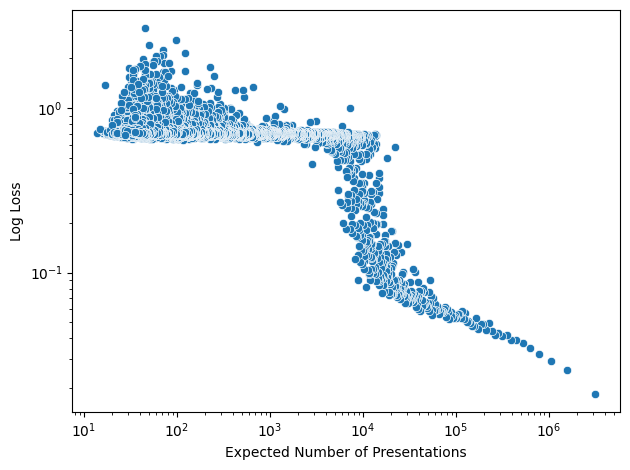

epoch 111 no test_metrics
epoch 112 no test_metrics
epoch 113 no test_metrics
epoch 114 no test_metrics
epoch 115 no test_metrics
epoch 116 no test_metrics
epoch 117 no test_metrics
epoch 118 no test_metrics
epoch 119 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


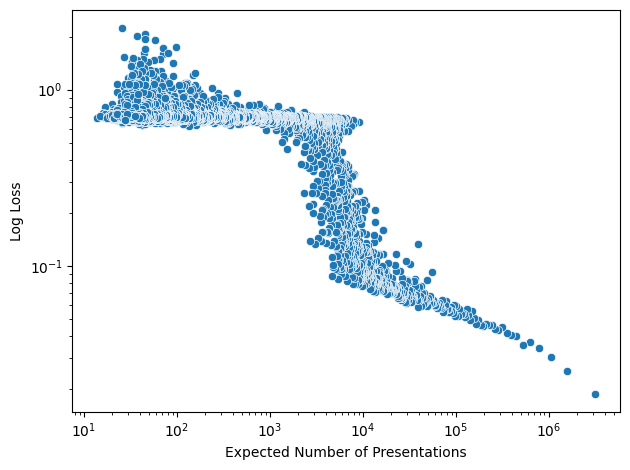

epoch 121 no test_metrics
epoch 122 no test_metrics
epoch 123 no test_metrics
epoch 124 no test_metrics
epoch 125 no test_metrics
epoch 126 no test_metrics
epoch 127 no test_metrics
epoch 128 no test_metrics
epoch 129 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


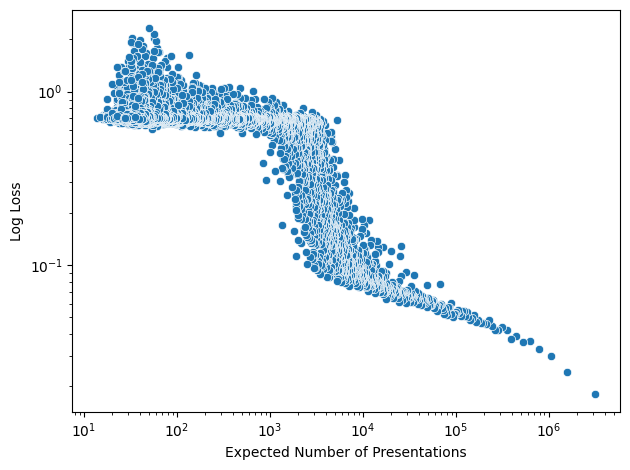

epoch 131 no test_metrics
epoch 132 no test_metrics
epoch 133 no test_metrics
epoch 134 no test_metrics
epoch 135 no test_metrics
epoch 136 no test_metrics
epoch 137 no test_metrics
epoch 138 no test_metrics
epoch 139 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


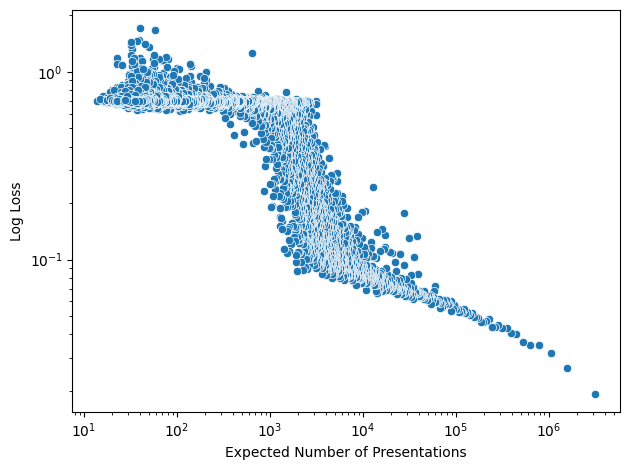

epoch 141 no test_metrics
epoch 142 no test_metrics
epoch 143 no test_metrics
epoch 144 no test_metrics
epoch 145 no test_metrics
epoch 146 no test_metrics
epoch 147 no test_metrics
epoch 148 no test_metrics
epoch 149 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


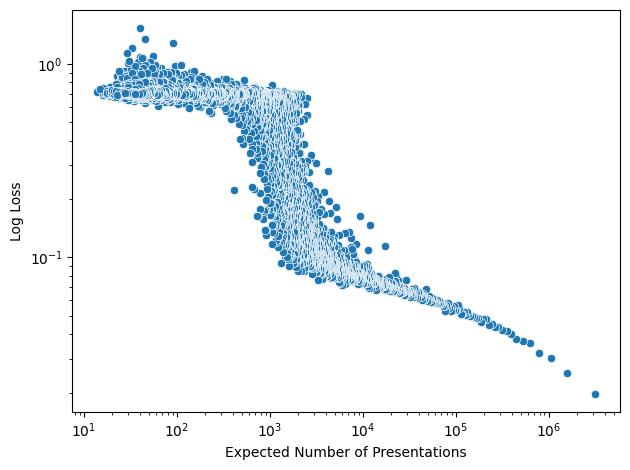

epoch 151 no test_metrics
epoch 152 no test_metrics
epoch 153 no test_metrics
epoch 154 no test_metrics
epoch 155 no test_metrics
epoch 156 no test_metrics
epoch 157 no test_metrics
epoch 158 no test_metrics
epoch 159 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


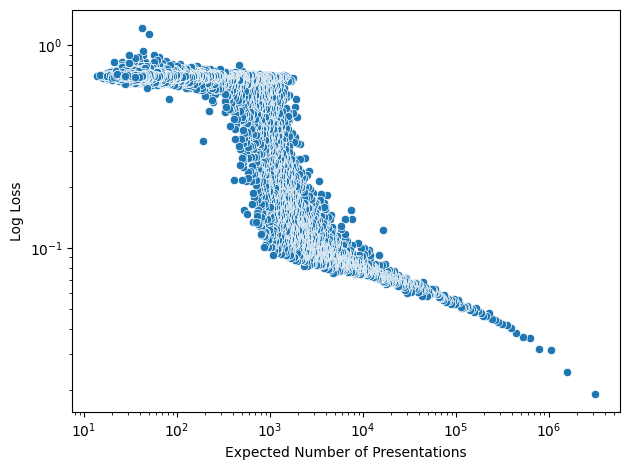

epoch 161 no test_metrics
epoch 162 no test_metrics
epoch 163 no test_metrics
epoch 164 no test_metrics
epoch 165 no test_metrics
epoch 166 no test_metrics
epoch 167 no test_metrics
epoch 168 no test_metrics
epoch 169 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


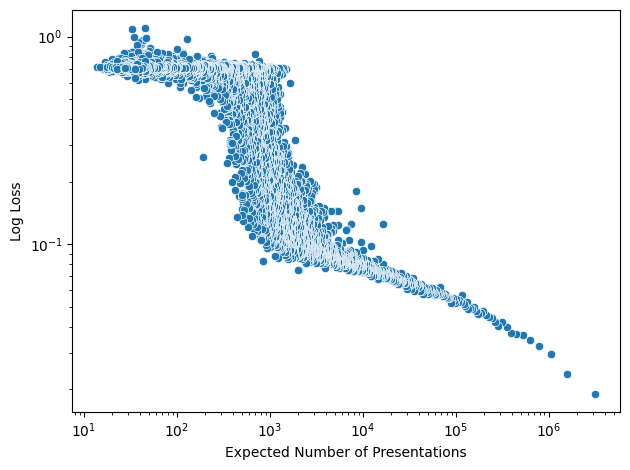

epoch 171 no test_metrics
epoch 172 no test_metrics
epoch 173 no test_metrics
epoch 174 no test_metrics
epoch 175 no test_metrics
epoch 176 no test_metrics
epoch 177 no test_metrics
epoch 178 no test_metrics
epoch 179 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


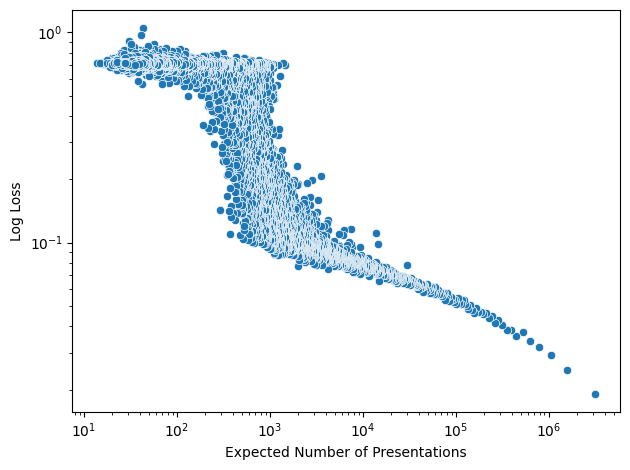

epoch 181 no test_metrics
epoch 182 no test_metrics
epoch 183 no test_metrics
epoch 184 no test_metrics
epoch 185 no test_metrics
epoch 186 no test_metrics
epoch 187 no test_metrics
epoch 188 no test_metrics
epoch 189 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


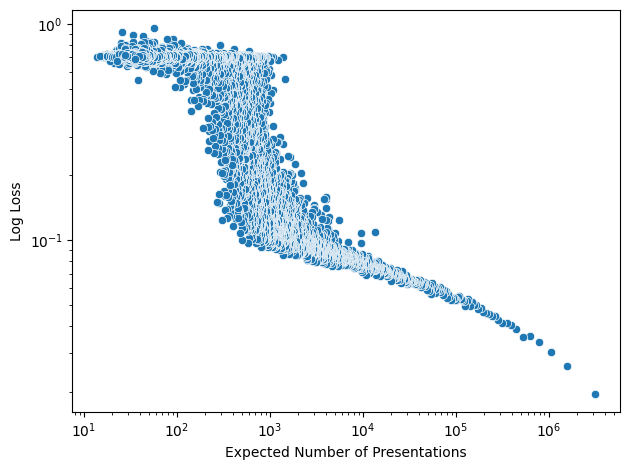

epoch 191 no test_metrics
epoch 192 no test_metrics
epoch 193 no test_metrics
epoch 194 no test_metrics
epoch 195 no test_metrics
epoch 196 no test_metrics
epoch 197 no test_metrics
epoch 198 no test_metrics
epoch 199 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


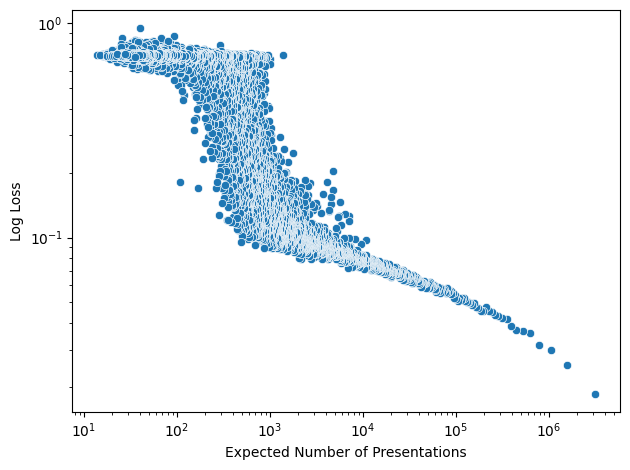

epoch 201 no test_metrics
epoch 202 no test_metrics
epoch 203 no test_metrics
epoch 204 no test_metrics
epoch 205 no test_metrics
epoch 206 no test_metrics
epoch 207 no test_metrics
epoch 208 no test_metrics
epoch 209 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


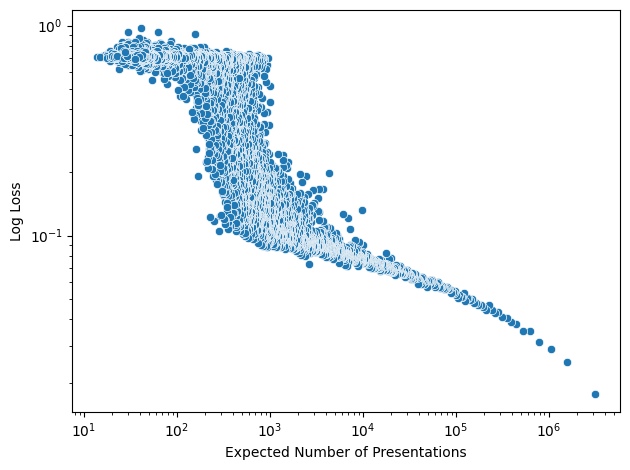

epoch 211 no test_metrics
epoch 212 no test_metrics
epoch 213 no test_metrics
epoch 214 no test_metrics
epoch 215 no test_metrics
epoch 216 no test_metrics
epoch 217 no test_metrics
epoch 218 no test_metrics
epoch 219 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


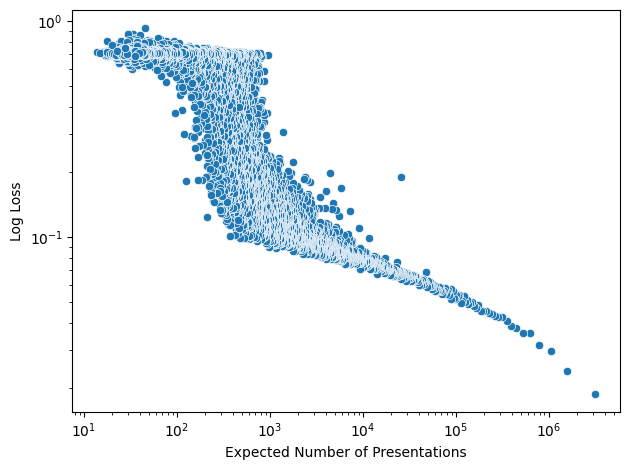

epoch 221 no test_metrics
epoch 222 no test_metrics
epoch 223 no test_metrics
epoch 224 no test_metrics
epoch 225 no test_metrics
epoch 226 no test_metrics
epoch 227 no test_metrics
epoch 228 no test_metrics
epoch 229 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


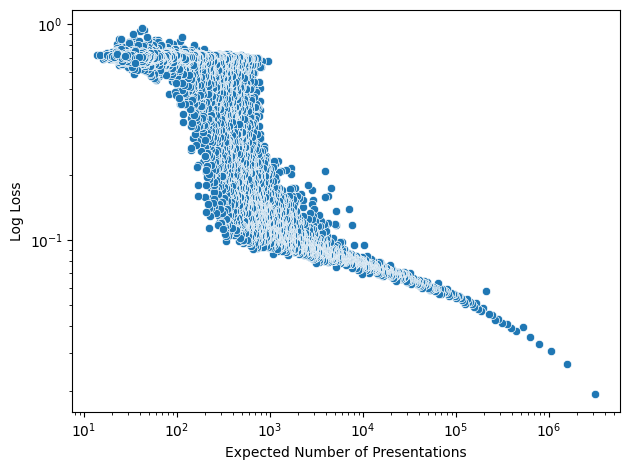

epoch 231 no test_metrics
epoch 232 no test_metrics
epoch 233 no test_metrics
epoch 234 no test_metrics
epoch 235 no test_metrics
epoch 236 no test_metrics
epoch 237 no test_metrics
epoch 238 no test_metrics
epoch 239 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


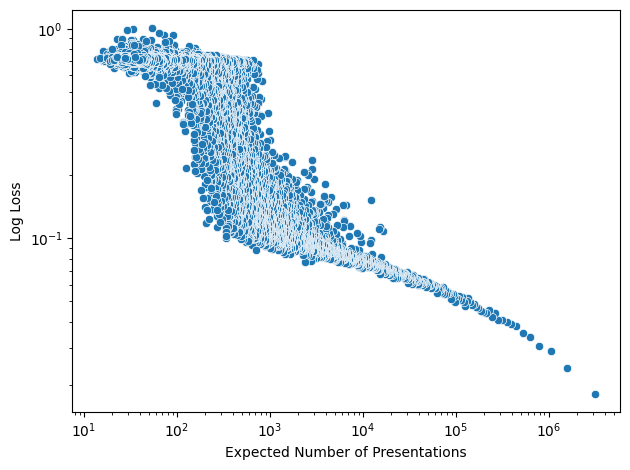

epoch 241 no test_metrics
epoch 242 no test_metrics
epoch 243 no test_metrics
epoch 244 no test_metrics
epoch 245 no test_metrics
epoch 246 no test_metrics
epoch 247 no test_metrics
epoch 248 no test_metrics
epoch 249 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


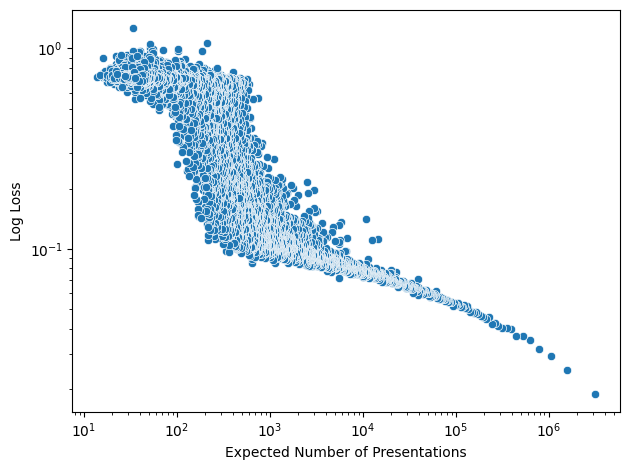

epoch 251 no test_metrics
epoch 252 no test_metrics
epoch 253 no test_metrics
epoch 254 no test_metrics
epoch 255 no test_metrics
epoch 256 no test_metrics
epoch 257 no test_metrics
epoch 258 no test_metrics
epoch 259 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


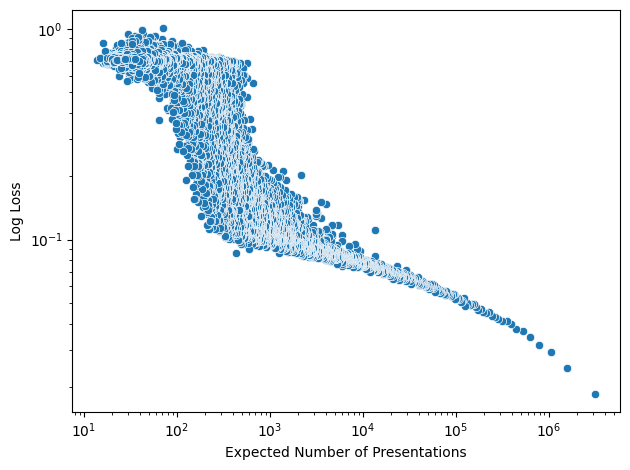

epoch 261 no test_metrics
epoch 262 no test_metrics
epoch 263 no test_metrics
epoch 264 no test_metrics
epoch 265 no test_metrics
epoch 266 no test_metrics
epoch 267 no test_metrics
epoch 268 no test_metrics
epoch 269 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


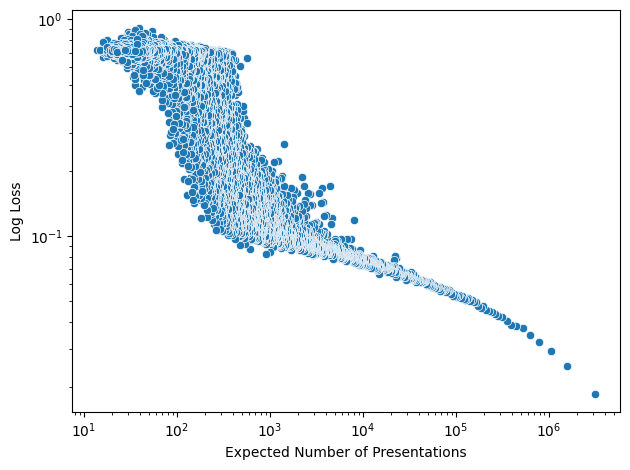

epoch 271 no test_metrics
epoch 272 no test_metrics
epoch 273 no test_metrics
epoch 274 no test_metrics
epoch 275 no test_metrics
epoch 276 no test_metrics
epoch 277 no test_metrics
epoch 278 no test_metrics
epoch 279 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


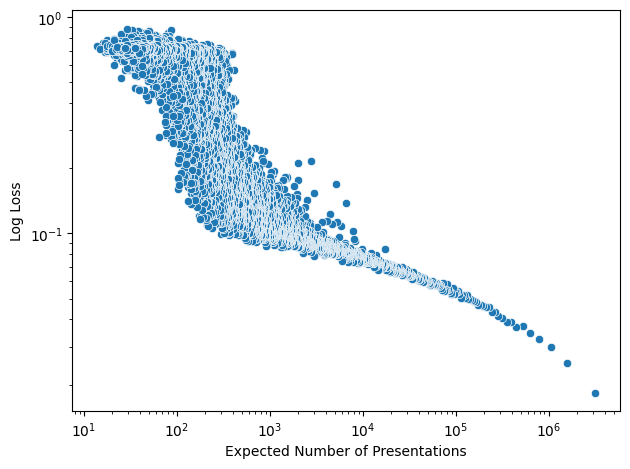

epoch 281 no test_metrics
epoch 282 no test_metrics
epoch 283 no test_metrics
epoch 284 no test_metrics
epoch 285 no test_metrics
epoch 286 no test_metrics
epoch 287 no test_metrics
epoch 288 no test_metrics
epoch 289 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


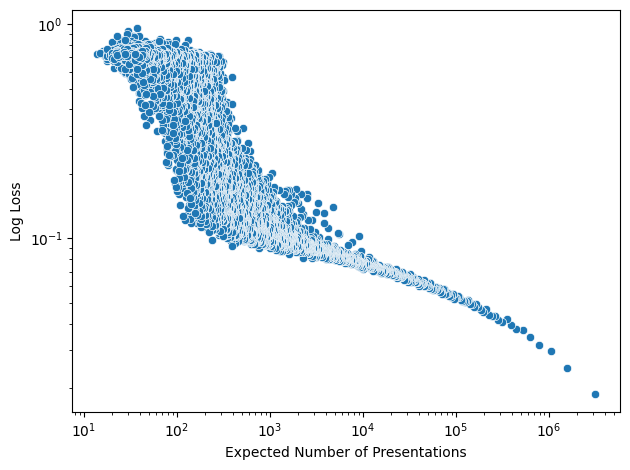

epoch 291 no test_metrics
epoch 292 no test_metrics
epoch 293 no test_metrics
epoch 294 no test_metrics
epoch 295 no test_metrics
epoch 296 no test_metrics
epoch 297 no test_metrics
epoch 298 no test_metrics
epoch 299 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


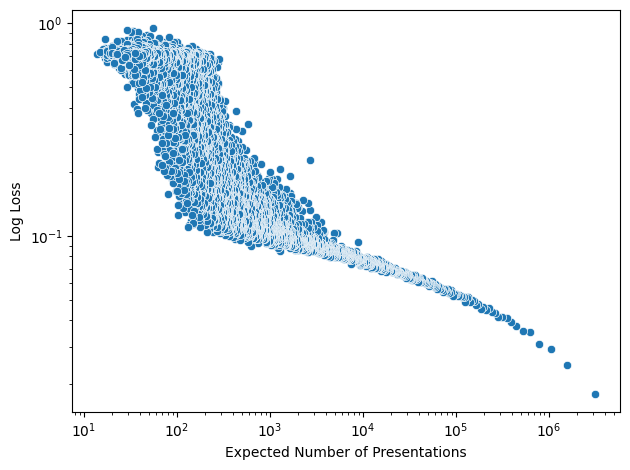

epoch 301 no test_metrics
epoch 302 no test_metrics
epoch 303 no test_metrics
epoch 304 no test_metrics
epoch 305 no test_metrics
epoch 306 no test_metrics
epoch 307 no test_metrics
epoch 308 no test_metrics
epoch 309 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


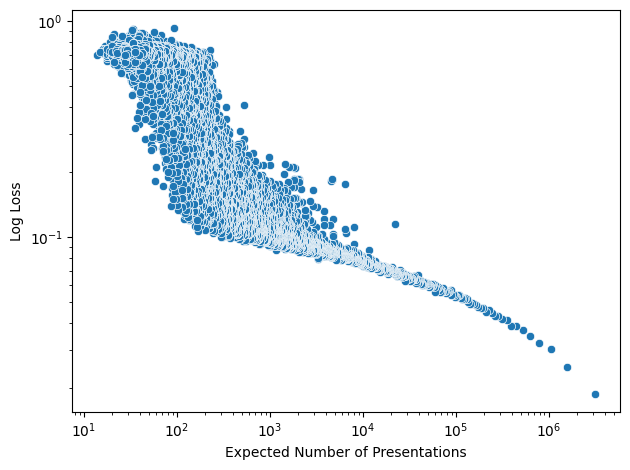

epoch 311 no test_metrics
epoch 312 no test_metrics
epoch 313 no test_metrics
epoch 314 no test_metrics
epoch 315 no test_metrics
epoch 316 no test_metrics
epoch 317 no test_metrics
epoch 318 no test_metrics
epoch 319 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


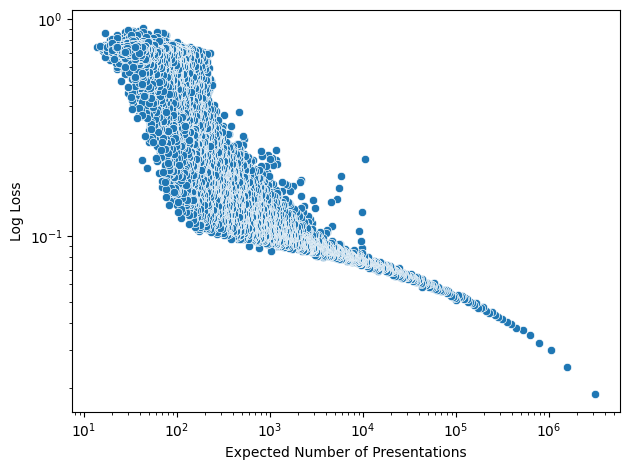

epoch 321 no test_metrics
epoch 322 no test_metrics
epoch 323 no test_metrics
epoch 324 no test_metrics
epoch 325 no test_metrics
epoch 326 no test_metrics
epoch 327 no test_metrics
epoch 328 no test_metrics
epoch 329 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


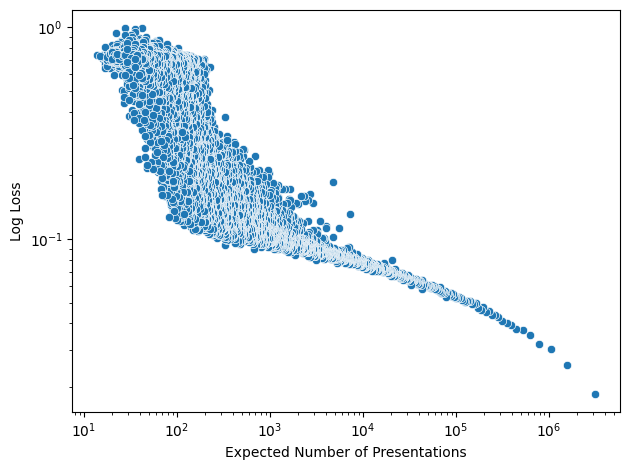

epoch 331 no test_metrics
epoch 332 no test_metrics
epoch 333 no test_metrics
epoch 334 no test_metrics
epoch 335 no test_metrics
epoch 336 no test_metrics
epoch 337 no test_metrics
epoch 338 no test_metrics
epoch 339 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


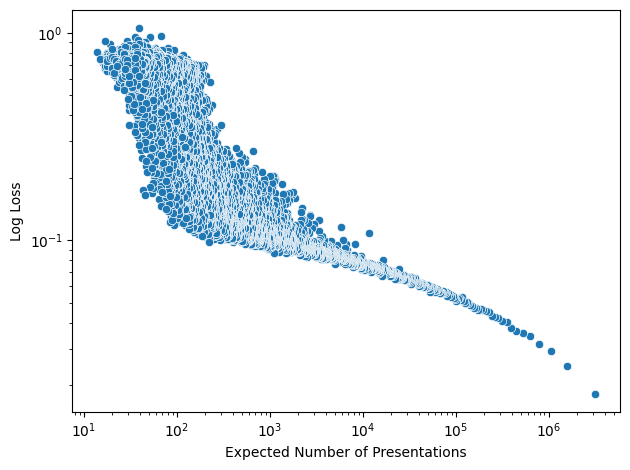

epoch 341 no test_metrics
epoch 342 no test_metrics
epoch 343 no test_metrics
epoch 344 no test_metrics
epoch 345 no test_metrics
epoch 346 no test_metrics
epoch 347 no test_metrics
epoch 348 no test_metrics
epoch 349 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


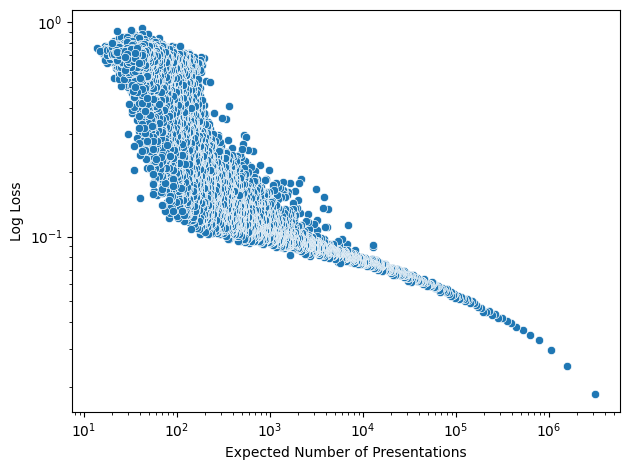

epoch 351 no test_metrics
epoch 352 no test_metrics
epoch 353 no test_metrics
epoch 354 no test_metrics
epoch 355 no test_metrics
epoch 356 no test_metrics
epoch 357 no test_metrics
epoch 358 no test_metrics
epoch 359 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


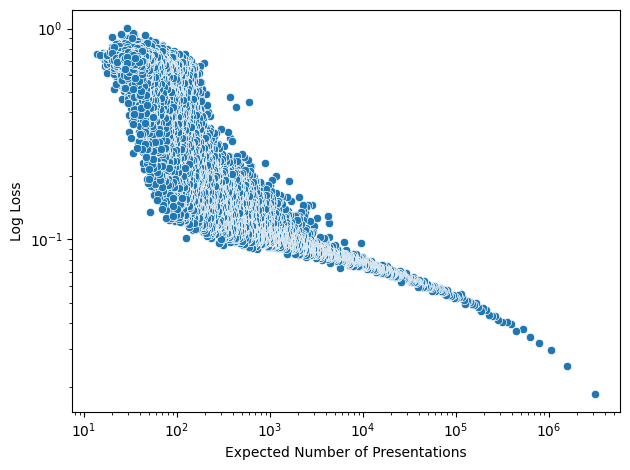

epoch 361 no test_metrics
epoch 362 no test_metrics
epoch 363 no test_metrics
epoch 364 no test_metrics
epoch 365 no test_metrics
epoch 366 no test_metrics
epoch 367 no test_metrics
epoch 368 no test_metrics
epoch 369 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


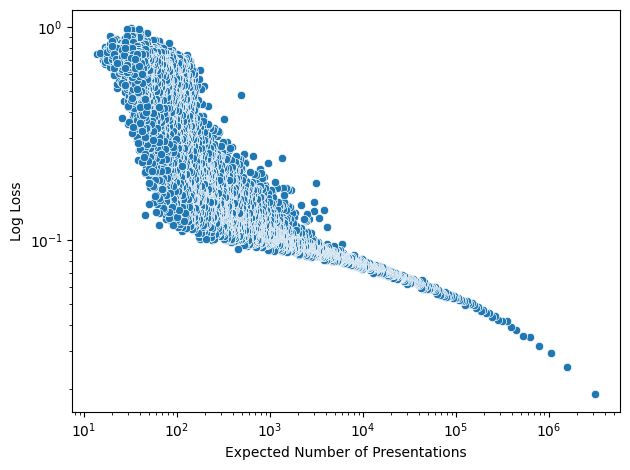

epoch 371 no test_metrics
epoch 372 no test_metrics
epoch 373 no test_metrics
epoch 374 no test_metrics
epoch 375 no test_metrics
epoch 376 no test_metrics
epoch 377 no test_metrics
epoch 378 no test_metrics
epoch 379 no test_metrics
dict_keys(['sequence_rank', 'length', 'logsoftmaxloss', 'accuracy'])


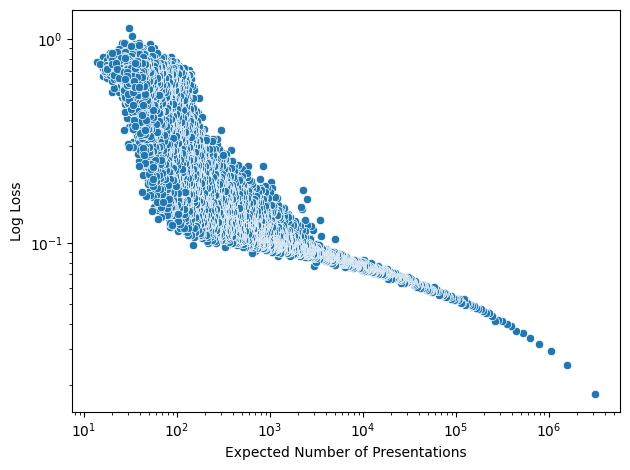

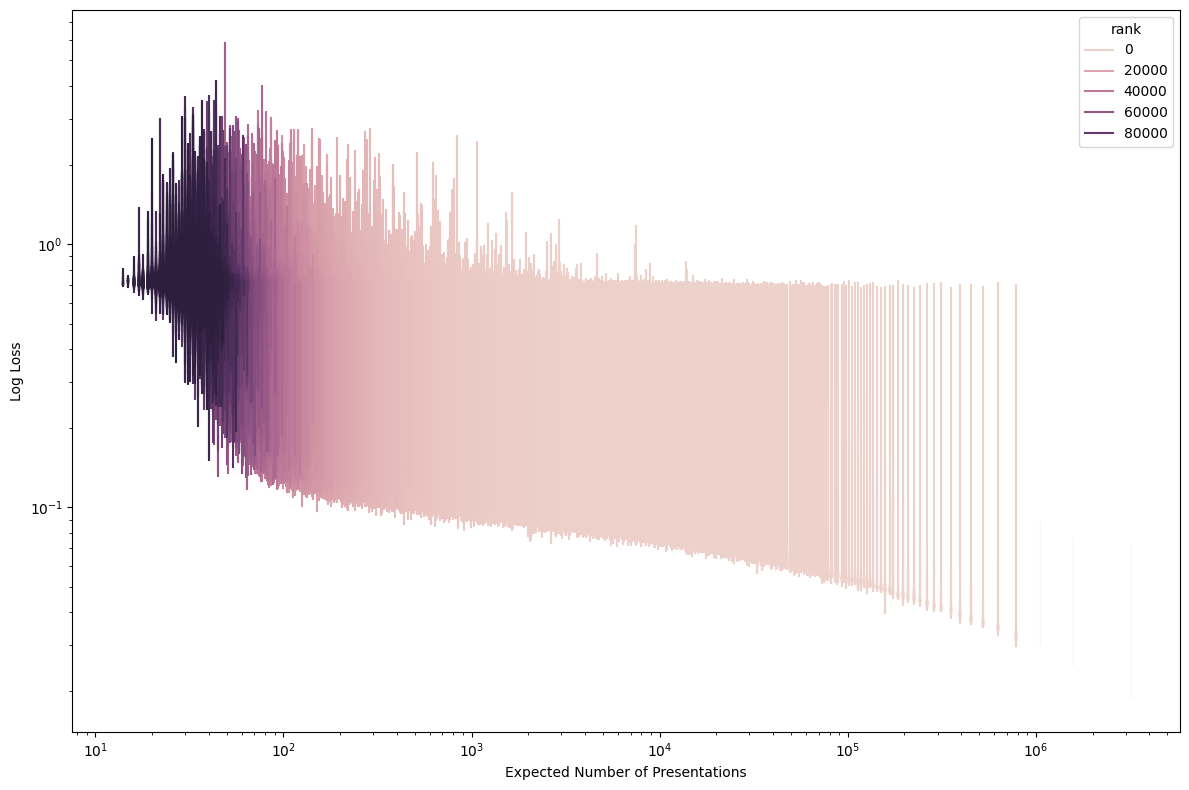

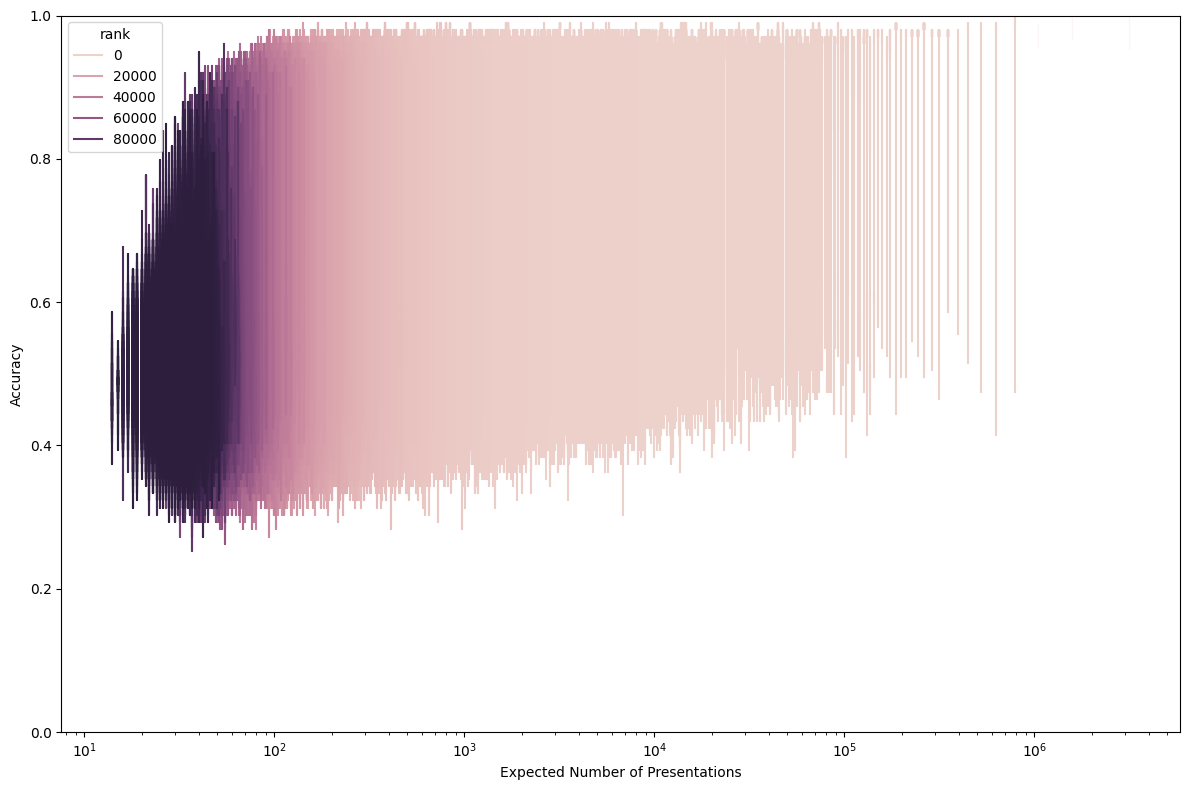

In [4]:
import pickle
import traceback
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
 
wandb_group_name = "memo_feb17_zipf"
# Filter runs by group name
# Initialize lists to store data for the heatmap
n_heads_list = []
n_layers_list = []
accuracy_list = []

item=0
runs = glob(f"./cache/{wandb_group_name}/{wandb_group_name}_*.pkl")

import json
from collections import defaultdict
runs=['./cache/memo_feb20_zipf/memo_feb20_zipf_transformer_K_100000_L_100_hidden_8_1740109735.440096.pkl']#"./cache/memo_feb24_zipf/memo_feb24_zipf_transformer_K_1000_L_100_hidden_8_1738918219.624416.pkl"]
for run in runs :
    # Extract model configurations
    print(run)
    # try: 
    with open(run, "rb") as f:
        record = pickle.load(f)
    # record = json.loads(run)
    print(record.keys(), len(record["logs"]), record["logs"][0].keys())
    # except Exception as e: 
    #     print (traceback.format_exc())
    #     continue
    
    # Extract model configurations
    acc_vs_presentations = defaultdict(list)
    for i, l in enumerate(record["logs"]):
         
        test = l.get("test_metrics")
        if len(test) > 0:
            print(test.keys())
            test = pd.DataFrame(test)
            #display(test)
            pivot = test.pivot_table(index="length", columns="sequence_rank", values="logsoftmaxloss")
            #display(pivot)
            # plt.figure(figsize=(12,8))
            # sns.heatmap(pivot, annot=False, vmin=0, vmax=1)
            # plt.xlabel("Sequence Rank")
            # plt.ylabel("Position in Sequence")
            # plt.title("Log Softmax Loss vs. Sequence Rank vs. Position in Sequence")
            # plt.tight_layout()
            # plt.savefig(f"./cache/zipf_figs/logsoftmaxloss_vs_sequence_rank_vs_position_in_sequence_epoch_{i}.png")
            # plt.show()
            pivot = test.pivot_table(index="length", columns="sequence_rank", values="accuracy")
            #display(pivot)
            # plt.figure(figsize=(12,8))
            # sns.heatmap(pivot, annot=False)
            # plt.xlabel("Sequence Rank")
            # plt.ylabel("Position in Sequence")
            # plt.title("Accuracy vs. Sequence Rank vs. Position in Sequence")
            # plt.savefig(f"./cache/zipf_figs/accuracy_vs_sequence_rank_vs_position_in_sequence_epoch_{i}.png")
            # plt.show()
            K = record["args"]["K"]
            p = np.array([1/(i+1) for i in range(K)])
            p /= np.sum(p)
            expected_number_of_presentations = l.get ("num_apppearances") 
            expected_number_of_presentations += (np.zeros_like(expected_number_of_presentations)+1e-10)
            
            # display (expected_number_of_presentations)
            # average over sequence rank, and plot logsoftmaxloss vs. expected number of presentations 
            avg_test = test.groupby("sequence_rank").mean()
             
            # loss_at_20 = test[test["length"] == 20]["logsoftmaxloss"] 
            avg_loss = avg_test["logsoftmaxloss"]
            accuracy_vs_presentations = test.groupby("sequence_rank").mean()["accuracy"].to_list()
             
            # print(accuracy_at_20)
            # display (loss_at_20)
            loss_vs_expected_number_of_presentations = pd.DataFrame({
                "expected_number_of_presentations": expected_number_of_presentations,
                "logsoftmaxloss": avg_loss,
                "accuracy_vs_presentations": accuracy_vs_presentations, 
            })
            acc_vs_presentations["number_of_presentations"].extend(expected_number_of_presentations)
            acc_vs_presentations["logsoftmaxloss"].extend(avg_loss)
            acc_vs_presentations["accuracy_vs_presentations"].extend(accuracy_vs_presentations)
            acc_vs_presentations["rank"].extend(range(K))
            sns.scatterplot (x = "expected_number_of_presentations", y = "logsoftmaxloss", data = loss_vs_expected_number_of_presentations)
            plt.yscale("log")
            plt.xscale("log")
            plt.xlabel("Expected Number of Presentations")
            plt.ylabel("Log Loss")
            plt.tight_layout()
            plt.savefig(f"./cache/zipf_figs/logsoftmaxloss_vs_expected_number_of_presentations_epoch_{i}.png")
            plt.show()
            # sns.scatterplot (x = "expected_number_of_presentations", y = "accuracy_vs_presentations", data = loss_vs_expected_number_of_presentations)
            # plt.xscale("log")
            # plt.xlabel("Expected Number of Presentations")
            # plt.ylabel("Accuracy")
            # plt.ylim(0, 1)
            # plt.tight_layout()
            # plt.savefig(f"./cache/zipf_figs/accuracy_vs_expected_number_of_presentations_epoch_{i}.png")
            # plt.show()
        else:
            print ("epoch", i, "no test_metrics")

    plt.figure(figsize=(12,8))
    # plot logsoftmaxloss vs. number of presentations
    sns.lineplot(x = "number_of_presentations", y = "logsoftmaxloss", hue = "rank", data = acc_vs_presentations)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Expected Number of Presentations")
    plt.ylabel("Log Loss")
    plt.tight_layout()
    plt.savefig(f"./cache/zipf_figs/logsoftmaxloss_vs_number_of_presentations_per_rank.png")
    plt.show()
    plt.figure(figsize=(12,8))
    # plot accuracy vs. number of presentations
    sns.lineplot(x = "number_of_presentations", y = "accuracy_vs_presentations", hue = "rank", data = acc_vs_presentations)
    plt.xscale("log")
    plt.xlabel("Expected Number of Presentations")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(f"./cache/zipf_figs/accuracy_vs_number_of_presentations_per_rank.png")
    plt.show()
    

Plotting


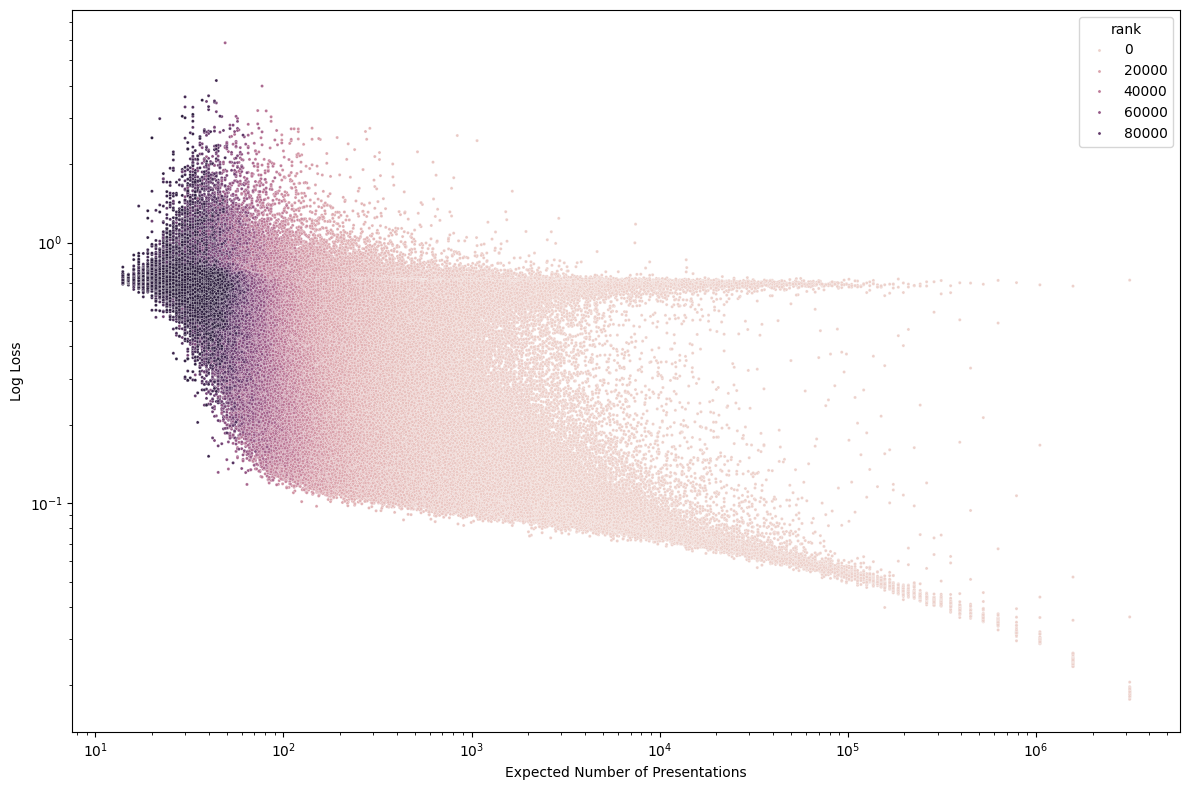

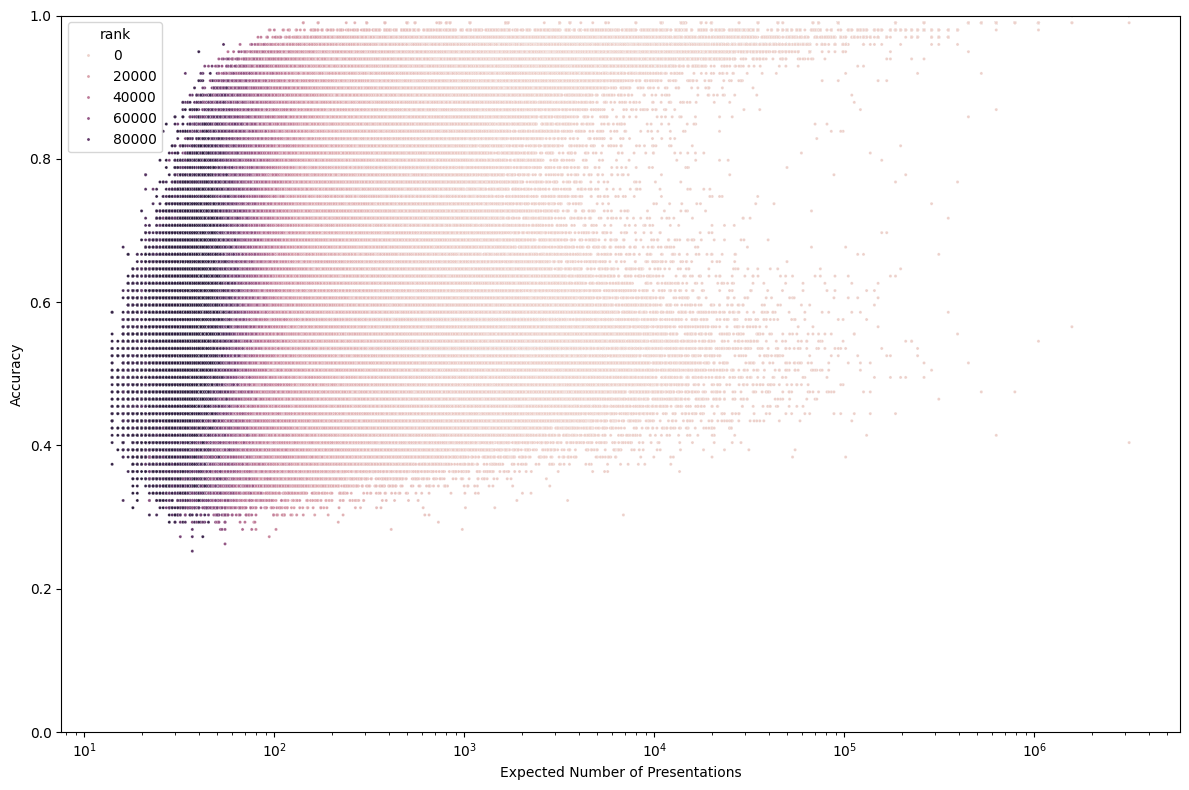

In [5]:
plt.figure(figsize=(12,8))
_acc_vs_presentations = pd.DataFrame(acc_vs_presentations)
_acc_vs_presentations = _acc_vs_presentations[_acc_vs_presentations["number_of_presentations"] > 1e-5]
print("Plotting")
# plot logsoftmaxloss vs. number of presentations
sns.scatterplot(x = "number_of_presentations", y = "logsoftmaxloss", hue = "rank", data = _acc_vs_presentations, s=5)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Expected Number of Presentations")
plt.ylabel("Log Loss")
plt.tight_layout()
plt.savefig(f"./cache/zipf_figs/logsoftmaxloss_vs_number_of_presentations_per_rank.png")
plt.show()
plt.figure(figsize=(12,8))
# plot accuracy vs. number of presentations
sns.scatterplot(x = "number_of_presentations", y = "accuracy_vs_presentations", hue = "rank", data = _acc_vs_presentations, s=5)
plt.xscale("log")
plt.xlabel("Expected Number of Presentations")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(f"./cache/zipf_figs/accuracy_vs_number_of_presentations_per_rank.png")
plt.show()

# May 30

## Looking at attention weights over all sequences

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may26_zipf_onelayerattention_lr_1e-3_vary_num_hidden_features_num_heads/*'
df = defaultdict(list)
for folder in glob(f):
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        print("lr", data["args"]["lr"])
        if data["args"]["lr"] > 2e-4:
            continue
    except Exception as e:
        print("error", e)
        continue
